In [2]:
import torch
import matplotlib.pyplot as plt

# For presentations purposes only (not needed in Colab)
plt.style.use('notebook.mplstyle')
# Keeps the kernel from dying in notebooks on Windows machines (not needed in Colab)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

This notebook shows how to use PyTorch's [autograd package](https://pytorch.org/docs/stable/autograd.html) to compute derivatives to arbitrary functions. The package is based on [automatic differention](https://www.youtube.com/watch?v=wG_nF1awSSY) which creates a computational graph of your function. The basic logic is that a computer will always execute your function by performing a set of elementary arithmetic operations and functions (making up the computational graph), thus making it possible to find the derivative by iteratively applying the chain rule to these elementary operations and functions. Quite counter intuitively, automatic differentiation can often be more computationally efficient than using an analytical solution.

The main requirement for autograd is that it can only be used together with PyTorch tensors (think numpy array with additional features) that have the requires_grad flag set to True. PyTorch will automatically create a computational graph from such tensors, and the autograd package lets you evaluate the derivative. This is best illustrated with an example. To begin with, we define a tensor (array) of input values to a function (the inputs for which we wish to evaluate the derivative):

In [3]:
x = torch.linspace(-2., 2, 100, requires_grad=True)

Next, we define the function whose derivative we want to compute,

In [4]:
def f(x: torch.Tensor) -> torch.Tensor:
    """Define a function to take the derivative of"""
    return x**2

as well as a function that evaluates the derivative using autograd. Observe that the create_graph=True argument is neccessary for computing higher order derivatives, as it tells autograd to create a new computational graph from the computations performed to evaluate the derivative. This way you can compute higher order derivatives iteratively within a loop.

In [5]:
def df(fun, x:torch.Tensor, order:int=1) -> torch.Tensor:
    """Compute the nth orter derivative with respect to x using PyTorch autograd engine"""
    df = fun(x)
    for _ in range(order):
        df = torch.autograd.grad(
            df,
            x,
            grad_outputs=torch.ones_like(x),
            create_graph=True
        )[0]

    return df

Finally, we plot the defined function and its first two derivatives to validate that everything works. Observe that the tensors need to be detached from the computational graph before you can use them for other purposes, such as plotting the values.

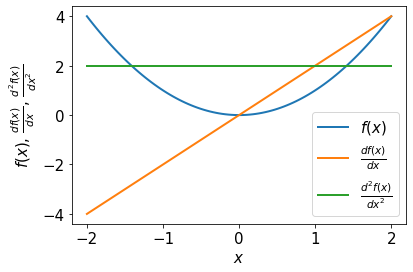

In [6]:
plt.plot(x.detach(), f(x).detach(), '-', label='$f(x)$')
plt.plot(x.detach(), df(f, x, order=1).detach(), '-', label='$\\frac{df(x)}{dx}$')
plt.plot(x.detach(), df(f, x, order=2).detach(), '-', label='$\\frac{d^2f(x)}{dx^2}$')
plt.legend()
plt.gca().set(xlabel='$x$', ylabel='$f(x)$, $\\frac{df(x)}{dx}$, $\\frac{d^2f(x)}{dx^2}$');